### Assignment: Building a contact sheet with the RGB channels:

In [18]:
import PIL
import pytesseract
from PIL import Image, ImageFilter, ImageEnhance, ImageFont, ImageDraw
from IPython.display import display

In [2]:
# Opening a white image to catch the color:

white = Image.open('images/white.jpg')

In [3]:
# Creating an empty list for the images that will be part of the contact sheet:

images = []

In [4]:
# Creating a list of intensities between 0 and 1.

intensity = [0.1, 0.5, 0.9]

In [5]:
# FIRST ROW: 3 blue images (decreasing the reds)

for color in intensity:
    # Open the image and convert to RGB:
    image = Image.open('images/faroe.jpg').convert('RGB')
    
    # There are 3 channels. We have to split them:
    r, g, b = image.split()
    
    # Decreasing the reds:
    r = r.point(lambda i: i * color)
    
    # Recombining back to RGB image
    result = Image.merge('RGB', (r,g,b))
    
    # Resizing the image:
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Creating a new image for the background:
    new = Image.new('RGB', (result.width,30), color = (0,0,0))
    
    # Passing the location of the font and the size:
    font = ImageFont.truetype('FanwoodText-Regular.ttf', 20)
    
    # Instantiating the ImageDraw class passing the new image created:
    draw = ImageDraw.Draw(new)
    
    # Using the text method with the draw object to write the channel and intensity:
    channel = 0
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
              stroke_width = 1, stroke_fill = result.getpixel((0,50)),
              font = font, fill = white.getpixel((0,0)))
    
    # Creating a new image using the objects created above:
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0,result.height))
    sheet.paste(result,(0,0))
    
    # Append the recombined image to the images list
    images.append(sheet)

In [6]:
# SECOND ROW: 3 purple images (decreasing the greens)

for color in intensity:
    # Open the image and convert to RGB:
    image = Image.open('images/faroe.jpg').convert('RGB')
    
    # There are 3 channels. We have to split them:
    r, g, b = image.split()
    
    # Decreasing the reds:
    g = g.point(lambda i: i * color)
    
    # Recombining back to RGB image
    result = Image.merge('RGB', (r,g,b))
    
    # Resizing the image:
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Creating a new image for the background:
    new = Image.new('RGB', (result.width,30), color = (0,0,0))
    
    # Passing the location of the font and the size:
    font = ImageFont.truetype('FanwoodText-Regular.ttf', 20)
    
    # Instantiating the ImageDraw class passing the new image created:
    draw = ImageDraw.Draw(new)
    
    # Using the text method with the draw object to write the channel and intensity:
    channel = 1
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
              stroke_width = 1, stroke_fill = result.getpixel((0,50)),
              font = font, fill = white.getpixel((0,0)))
    
    # Creating a new image using the objects created above:
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0,result.height))
    sheet.paste(result,(0,0))
    
    # Append the recombined image to the images list
    images.append(sheet)

In [7]:
# THIRD ROW: 3 yellow images (decreasing the blues)

for color in intensity:
    # Open the image and convert to RGB:
    image = Image.open('images/faroe.jpg').convert('RGB')
    
    # There are 3 channels. We have to split them:
    r, g, b = image.split()
    
    # Decreasing the reds:
    b = b.point(lambda i: i * color)
    
    # Recombining back to RGB image
    result = Image.merge('RGB', (r,g,b))
    
    # Resizing the image:
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Creating a new image for the background:
    new = Image.new('RGB', (result.width,30), color = (0,0,0))
    
    # Passing the location of the font and the size:
    font = ImageFont.truetype('FanwoodText-Regular.ttf', 20)
    
    # Instantiating the ImageDraw class passing the new image created:
    draw = ImageDraw.Draw(new)
    
    # Using the text method with the draw object to write the channel and intensity:
    channel = 2
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
              stroke_width = 1, stroke_fill = result.getpixel((0,50)),
              font = font, fill = white.getpixel((0,0)))
    
    # Creating a new image using the objects created above:
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0,result.height))
    sheet.paste(result,(0,0))
    
    # Append the recombined image to the images list
    images.append(sheet)

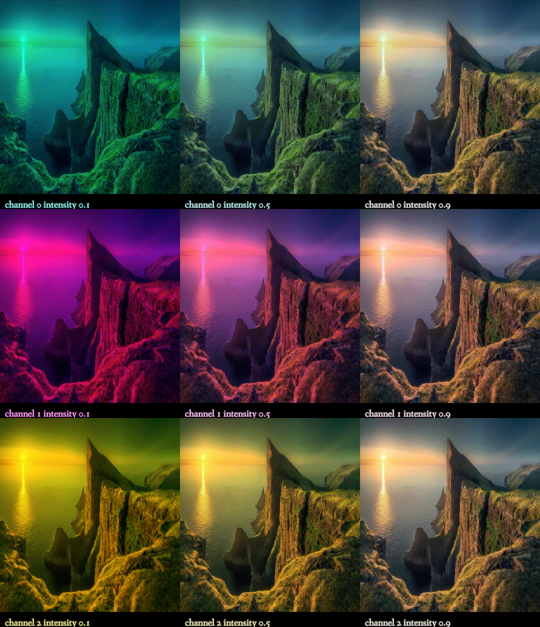

In [8]:
# Creating a contact sheet from different colors:

first_image = images[0]

# The contact sheet size will be 3x the image size (because we are building a 3x3 sheet)
contact_sheet = PIL.Image.new(mode = first_image.mode, size = (first_image.width*3, first_image.height*3))
x = 0
y = 0

for img in images:
    # Pasting each image into the contact sheet:
    contact_sheet.paste(img, (x,y))
    # Updating our x position.
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x = x + first_image.width
        
# Resizing and displaying the contact sheet:

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2), int(contact_sheet.height/2)))
display(contact_sheet)

### Trying to use widgets:

In [9]:
from ipywidgets import interact

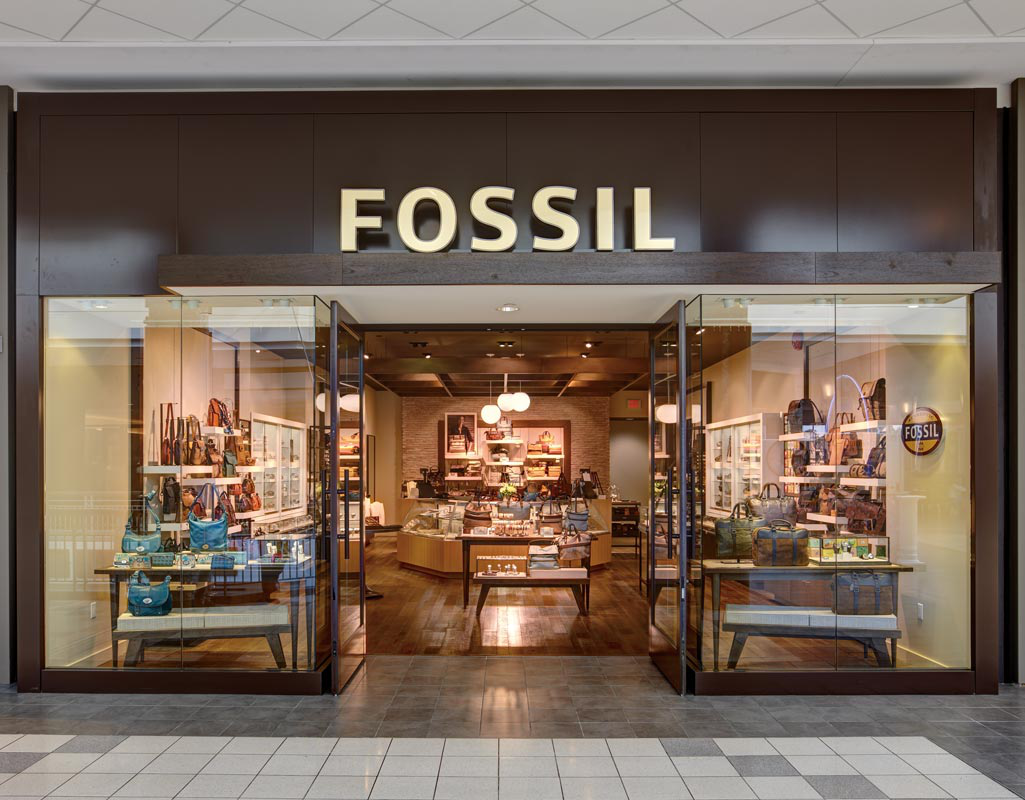

In [10]:
# Reading the image:

image_store = Image.open('images/storefront.png')
display(image_store)

In [15]:
@interact(left=100, top=100, right=300, bottom=300)

# Now we just write the function we had before
def draw_border(left, top, right, bottom):
    img=image_store.copy()
    drawing_object=ImageDraw.Draw(img)
    drawing_object.rectangle((left,top,right,bottom), fill = None, outline ='red')
    display(img)

interactive(children=(IntSlider(value=100, description='left', max=300, min=-100), IntSlider(value=100, descri…

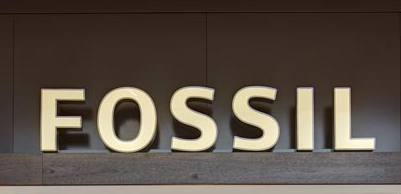

In [17]:
# Using the values to crop the image exactly at the name of the store (left=300, top=100, right=701, bottom=294)
box=(300,100,701,294)
store_name = image_store.crop(box)
display(store_name)

In [19]:
# Lets print out the text
pytesseract.image_to_string(store_name)

'FOSSIL\n\x0c'